<a href="https://colab.research.google.com/github/yulingchen628/10901ML/blob/main/ML_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/drive/Shareddrives/5502GS/ML/dataset/Traffic_Accidents.csv')
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Accident Number,Date and Time,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Property Damage,Hit and Run,Reporting Officer,Collision Type Code,Collision Type Description,Weather Code,Weather Description,Illumination Code,Illumination Description,Harmful Code,Harmful Description,Street Address,City,State,ZIP,RPA,Precinct,Latitude,Longitude,Mapped Location
0,20170330208,04/14/2017 10:44:00 AM,2.0,1.0,0,NaN,False,716886,11.0,Front to Rear,21.0,CLEAR,1.0,DAYLIGHT,12,MOTOR VEHICLE IN TRANSPORT,I24E & I24 E ENT RAMP,NASHVILLE,TN,37210.0,8102.0,SOUTH,36.1363,-86.7270,POINT (-86.727 36.1363)
1,20161069361,12/02/2016 08:09:00 PM,2.0,0.0,0,NaN,True,240979,4.0,ANGLE,21.0,CLEAR,3.0,DARK - LIGHTED,12,MOTOR VEHICLE IN TRANSPORT,HAYWOOD LN & ANTIOCH PKE,NASHVILLE,TN,37211.0,8851.0,SOUTH,36.0702,-86.6848,POINT (-86.6848 36.0702)
2,20170141034,02/13/2017 12:56:00 PM,2.0,1.0,0,NaN,False,594473,4.0,ANGLE,21.0,CLEAR,1.0,DAYLIGHT,12,MOTOR VEHICLE IN TRANSPORT,BLACKMAN RD & TIMBERHILL DR,NASHVILLE,TN,37220.0,8613.0,MIDTOW,36.0747,-86.7548,POINT (-86.7548 36.0747)
3,20161023575,11/17/2016 04:29:00 PM,2.0,0.0,0,NaN,False,909486,11.0,Front to Rear,21.0,CLEAR,5.0,DUSK,12,MOTOR VEHICLE IN TRANSPORT,OLD HICKORY BLVD & BRENTWOOD COMMONS WAY,BRENTWOOD,TN,37027.0,8623.0,MIDTOW,36.0412,-86.7766,POINT (-86.7766 36.0412)
4,20170321614,04/11/2017 11:17:00 PM,2.0,0.0,0,NaN,False,110096,11.0,Front to Rear,2.0,RAIN,3.0,DARK - LIGHTED,12,MOTOR VEHICLE IN TRANSPORT,MT VIEW RD & BELL RD,ANTIOCH,TN,37013.0,8865.0,SOUTH,36.0500,-86.6496,POINT (-86.6496 36.05)


In [3]:
df.shape

(244451, 25)

In [4]:
df['year'] = df['Date and Time'].map(lambda x:str(x)[6:10])
df.head(3)

,Accident Number,Date and Time,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Property Damage,Hit and Run,Reporting Officer,Collision Type Code,Collision Type Description,Weather Code,Weather Description,Illumination Code,Illumination Description,Harmful Code,Harmful Description,Street Address,City,State,ZIP,RPA,Precinct,Latitude,Longitude,Mapped Location,year
0,20170330208,04/14/2017 10:44:00 AM,2.0,1.0,0,NaN,False,716886,11.0,Front to Rear,21.0,CLEAR,1.0,DAYLIGHT,12,MOTOR VEHICLE IN TRANSPORT,I24E & I24 E ENT RAMP,NASHVILLE,TN,37210.0,8102.0,SOUTH,36.1363,-86.7270,POINT (-86.727 36.1363),2017
1,20161069361,12/02/2016 08:09:00 PM,2.0,0.0,0,NaN,True,240979,4.0,ANGLE,21.0,CLEAR,3.0,DARK - LIGHTED,12,MOTOR VEHICLE IN TRANSPORT,HAYWOOD LN & ANTIOCH PKE,NASHVILLE,TN,37211.0,8851.0,SOUTH,36.0702,-86.6848,POINT (-86.6848 36.0702),2016
2,20170141034,02/13/2017 12:56:00 PM,2.0,1.0,0,NaN,False,594473,4.0,ANGLE,21.0,CLEAR,1.0,DAYLIGHT,12,MOTOR VEHICLE IN TRANSPORT,BLACKMAN RD & TIMBERHILL DR,NASHVILLE,TN,37220.0,8613.0,MIDTOW,36.0747,-86.7548,POINT (-86.7548 36.0747),2017


In [5]:
df.drop(df[df['year'] == '2012'].index,axis=0,inplace=True)
df.drop(df[df['year'] == '2013'].index,axis=0,inplace=True)
df.drop(df[df['year'] == '2014'].index,axis=0,inplace=True)
df.drop(df[df['year'] == '2015'].index,axis=0,inplace=True)
df.drop(df[df['year'] == '2016'].index,axis=0,inplace=True)
df.drop(df[df['year'] == '2017'].index,axis=0,inplace=True)
df.drop(df[df['year'] == '2019'].index,axis=0,inplace=True)
df.drop(df[df['year'] == '2020'].index,axis=0,inplace=True)

In [6]:
df.head()

,Accident Number,Date and Time,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Property Damage,Hit and Run,Reporting Officer,Collision Type Code,Collision Type Description,Weather Code,Weather Description,Illumination Code,Illumination Description,Harmful Code,Harmful Description,Street Address,City,State,ZIP,RPA,Precinct,Latitude,Longitude,Mapped Location,year
1845,20170000819,01/01/2018 08:45:00 AM,1.0,1.0,0,True,False,332253,0.0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,21.0,CLEAR,1.0,DAYLIGHT,32,CULVERT,OLD HICKORY BLVD & MARYDALE DR,NASHVILLE,TN,37207.0,2025.0,MADISO,36.2718,-86.7615,POINT (-86.7615 36.2718),2018
4989,20170007441,01/03/2018 09:01:00 AM,2.0,0.0,0,NaN,False,544482,11.0,Front to Rear,21.0,CLEAR,1.0,DAYLIGHT,55,Motor Vehicle-In-Motion Outside Trafficw,WEST END AV & PARK DR,NASHVILLE,TN,37212.0,5817.0,MIDTOW,36.1404,-86.8179,POINT (-86.8179 36.1404),2018
11171,20170170810,02/21/2018 06:50:00 PM,2.0,0.0,0,NaN,False,633370,5.0,SIDESWIPE - SAME DIRECTION,22.0,CLOUDY,3.0,DARK - LIGHTED,12,MOTOR VEHICLE IN TRANSPORT,MM 54 8 I 24,NASHVILLE,TN,37211.0,8812.0,SOUTH,36.0968,-86.7085,POINT (-86.7085 36.0968),2018
11685,20170035976,01/11/2018 05:59:00 PM,2.0,0.0,0,NaN,False,191570,4.0,ANGLE,22.0,CLOUDY,3.0,DARK - LIGHTED,12,MOTOR VEHICLE IN TRANSPORT,LYNWOOD AV & 8TH AVS,NASHVILLE,TN,37203.0,6941.0,MIDTOW,36.1383,-86.7785,POINT (-86.7785 36.1383),2018
13845,20170467982,05/28/2018 09:30:00 PM,2.0,3.0,0,True,False,240943,4.0,ANGLE,21.0,CLEAR,3.0,DARK - LIGHTED,12;30,MOTOR VEHICLE IN TRANSPORT;UTILITY POLE,4TH AVS & I40 W EXT RAMP,NASHVILLE,TN,37203.0,4007.0,CENTRA,36.1509,-86.7706,POINT (-86.7706 36.1509),2018


In [7]:
df.shape

(34470, 26)

In [8]:
df['year'].value_counts()

2018    34470
Name: year, dtype: int64

In [9]:
df.drop(['Accident Number'],axis=1,inplace=True)
df.drop(['Weather Code'],axis=1,inplace=True)
df.drop(['Reporting Officer'],axis=1,inplace=True)
df.drop(['Property Damage'],axis=1,inplace=True)
df.drop(['Collision Type Code'],axis=1,inplace=True)
df.drop(['Illumination Code'],axis=1,inplace=True)
df.drop(['Harmful Code'],axis=1,inplace=True)
df.drop(['State'],axis=1,inplace=True)
df.drop(['RPA'],axis=1,inplace=True) 
df.drop(['Mapped Location'],axis=1,inplace=True) 
df.drop(['City'],axis=1,inplace=True) 
df.drop(['Street Address'],axis=1,inplace=True)
df.drop(['ZIP'],axis=1,inplace=True)
df.drop(['Precinct'],axis=1,inplace=True)
df.head()

,Date and Time,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Hit and Run,Collision Type Description,Weather Description,Illumination Description,Harmful Description,Latitude,Longitude,year
1845,01/01/2018 08:45:00 AM,1.0,1.0,0,False,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,CLEAR,DAYLIGHT,CULVERT,36.2718,-86.7615,2018
4989,01/03/2018 09:01:00 AM,2.0,0.0,0,False,Front to Rear,CLEAR,DAYLIGHT,Motor Vehicle-In-Motion Outside Trafficw,36.1404,-86.8179,2018
11171,02/21/2018 06:50:00 PM,2.0,0.0,0,False,SIDESWIPE - SAME DIRECTION,CLOUDY,DARK - LIGHTED,MOTOR VEHICLE IN TRANSPORT,36.0968,-86.7085,2018
11685,01/11/2018 05:59:00 PM,2.0,0.0,0,False,ANGLE,CLOUDY,DARK - LIGHTED,MOTOR VEHICLE IN TRANSPORT,36.1383,-86.7785,2018
13845,05/28/2018 09:30:00 PM,2.0,3.0,0,False,ANGLE,CLEAR,DARK - LIGHTED,MOTOR VEHICLE IN TRANSPORT;UTILITY POLE,36.1509,-86.7706,2018


In [10]:
df.shape

(34470, 12)

In [11]:
import datetime
df['Date and Time'] = pd.to_datetime(df['Date and Time'])   
df['date'] = df['Date and Time'].dt.date                    
df['date'] = pd.to_datetime(df['date'])                      
df['month'] = df['date'].dt.month                          

df['time'] = df['Date and Time'].dt.time              
df['hour'] = df['Date and Time'].dt.hour   

In [12]:
df.head()

,Date and Time,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Hit and Run,Collision Type Description,Weather Description,Illumination Description,Harmful Description,Latitude,Longitude,year,date,month,time,hour
1845,2018-01-01 08:45:00,1.0,1.0,0,False,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,CLEAR,DAYLIGHT,CULVERT,36.2718,-86.7615,2018,2018-01-01,1,08:45:00,8
4989,2018-01-03 09:01:00,2.0,0.0,0,False,Front to Rear,CLEAR,DAYLIGHT,Motor Vehicle-In-Motion Outside Trafficw,36.1404,-86.8179,2018,2018-01-03,1,09:01:00,9
11171,2018-02-21 18:50:00,2.0,0.0,0,False,SIDESWIPE - SAME DIRECTION,CLOUDY,DARK - LIGHTED,MOTOR VEHICLE IN TRANSPORT,36.0968,-86.7085,2018,2018-02-21,2,18:50:00,18
11685,2018-01-11 17:59:00,2.0,0.0,0,False,ANGLE,CLOUDY,DARK - LIGHTED,MOTOR VEHICLE IN TRANSPORT,36.1383,-86.7785,2018,2018-01-11,1,17:59:00,17
13845,2018-05-28 21:30:00,2.0,3.0,0,False,ANGLE,CLEAR,DARK - LIGHTED,MOTOR VEHICLE IN TRANSPORT;UTILITY POLE,36.1509,-86.7706,2018,2018-05-28,5,21:30:00,21


In [13]:
df.isnull().sum()

Date and Time                   0
Number of Motor Vehicles        1
Number of Injuries              0
Number of Fatalities            0
Hit and Run                     0
Collision Type Description      1
Weather Description            72
Illumination Description       31
Harmful Description           328
Latitude                       32
Longitude                      32
year                            0
date                            0
month                           0
time                            0
hour                            0
dtype: int64

In [14]:
df.dropna(axis=0,how='any',inplace=True)

In [15]:
df.shape

(34025, 16)

In [16]:
df.isnull().sum()

Date and Time                 0
Number of Motor Vehicles      0
Number of Injuries            0
Number of Fatalities          0
Hit and Run                   0
Collision Type Description    0
Weather Description           0
Illumination Description      0
Harmful Description           0
Latitude                      0
Longitude                     0
year                          0
date                          0
month                         0
time                          0
hour                          0
dtype: int64

In [17]:
df['injury or fatality'] = df['Number of Injuries'] + df['Number of Fatalities']
df.head()

,Date and Time,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Hit and Run,Collision Type Description,Weather Description,Illumination Description,Harmful Description,Latitude,Longitude,year,date,month,time,hour,injury or fatality
1845,2018-01-01 08:45:00,1.0,1.0,0,False,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,CLEAR,DAYLIGHT,CULVERT,36.2718,-86.7615,2018,2018-01-01,1,08:45:00,8,1.0
4989,2018-01-03 09:01:00,2.0,0.0,0,False,Front to Rear,CLEAR,DAYLIGHT,Motor Vehicle-In-Motion Outside Trafficw,36.1404,-86.8179,2018,2018-01-03,1,09:01:00,9,0.0
11171,2018-02-21 18:50:00,2.0,0.0,0,False,SIDESWIPE - SAME DIRECTION,CLOUDY,DARK - LIGHTED,MOTOR VEHICLE IN TRANSPORT,36.0968,-86.7085,2018,2018-02-21,2,18:50:00,18,0.0
11685,2018-01-11 17:59:00,2.0,0.0,0,False,ANGLE,CLOUDY,DARK - LIGHTED,MOTOR VEHICLE IN TRANSPORT,36.1383,-86.7785,2018,2018-01-11,1,17:59:00,17,0.0
13845,2018-05-28 21:30:00,2.0,3.0,0,False,ANGLE,CLEAR,DARK - LIGHTED,MOTOR VEHICLE IN TRANSPORT;UTILITY POLE,36.1509,-86.7706,2018,2018-05-28,5,21:30:00,21,3.0


In [18]:
df['injury or fatality'].sum()

12386.0

In [19]:
df.drop(['Number of Injuries','Number of Fatalities'], axis=1, inplace=True)

In [20]:
df.head()

,Date and Time,Number of Motor Vehicles,Hit and Run,Collision Type Description,Weather Description,Illumination Description,Harmful Description,Latitude,Longitude,year,date,month,time,hour,injury or fatality
1845,2018-01-01 08:45:00,1.0,False,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,CLEAR,DAYLIGHT,CULVERT,36.2718,-86.7615,2018,2018-01-01,1,08:45:00,8,1.0
4989,2018-01-03 09:01:00,2.0,False,Front to Rear,CLEAR,DAYLIGHT,Motor Vehicle-In-Motion Outside Trafficw,36.1404,-86.8179,2018,2018-01-03,1,09:01:00,9,0.0
11171,2018-02-21 18:50:00,2.0,False,SIDESWIPE - SAME DIRECTION,CLOUDY,DARK - LIGHTED,MOTOR VEHICLE IN TRANSPORT,36.0968,-86.7085,2018,2018-02-21,2,18:50:00,18,0.0
11685,2018-01-11 17:59:00,2.0,False,ANGLE,CLOUDY,DARK - LIGHTED,MOTOR VEHICLE IN TRANSPORT,36.1383,-86.7785,2018,2018-01-11,1,17:59:00,17,0.0
13845,2018-05-28 21:30:00,2.0,False,ANGLE,CLEAR,DARK - LIGHTED,MOTOR VEHICLE IN TRANSPORT;UTILITY POLE,36.1509,-86.7706,2018,2018-05-28,5,21:30:00,21,3.0


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
df['Hit and Run'].unique()

array([False, True], dtype=object)

In [23]:
df['Hit and Run'] = le.fit_transform(df['Hit and Run'])
df.head()

,Date and Time,Number of Motor Vehicles,Hit and Run,Collision Type Description,Weather Description,Illumination Description,Harmful Description,Latitude,Longitude,year,date,month,time,hour,injury or fatality
1845,2018-01-01 08:45:00,1.0,0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,CLEAR,DAYLIGHT,CULVERT,36.2718,-86.7615,2018,2018-01-01,1,08:45:00,8,1.0
4989,2018-01-03 09:01:00,2.0,0,Front to Rear,CLEAR,DAYLIGHT,Motor Vehicle-In-Motion Outside Trafficw,36.1404,-86.8179,2018,2018-01-03,1,09:01:00,9,0.0
11171,2018-02-21 18:50:00,2.0,0,SIDESWIPE - SAME DIRECTION,CLOUDY,DARK - LIGHTED,MOTOR VEHICLE IN TRANSPORT,36.0968,-86.7085,2018,2018-02-21,2,18:50:00,18,0.0
11685,2018-01-11 17:59:00,2.0,0,ANGLE,CLOUDY,DARK - LIGHTED,MOTOR VEHICLE IN TRANSPORT,36.1383,-86.7785,2018,2018-01-11,1,17:59:00,17,0.0
13845,2018-05-28 21:30:00,2.0,0,ANGLE,CLEAR,DARK - LIGHTED,MOTOR VEHICLE IN TRANSPORT;UTILITY POLE,36.1509,-86.7706,2018,2018-05-28,5,21:30:00,21,3.0


In [24]:
df.drop(['Harmful Description'], axis=1, inplace=True)

In [25]:
df['Illumination Description'].unique()

array(['DAYLIGHT', 'DARK - LIGHTED', 'DARK - NOT LIGHTED', 'DUSK',
       'OTHER', 'UNKNOWN', 'DAWN', 'Dark-Unknown Lighting'], dtype=object)

In [26]:
df['Illumination Description'] = le.fit_transform(df['Illumination Description'])
df.head()

,Date and Time,Number of Motor Vehicles,Hit and Run,Collision Type Description,Weather Description,Illumination Description,Latitude,Longitude,year,date,month,time,hour,injury or fatality
1845,2018-01-01 08:45:00,1.0,0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,CLEAR,3,36.2718,-86.7615,2018,2018-01-01,1,08:45:00,8,1.0
4989,2018-01-03 09:01:00,2.0,0,Front to Rear,CLEAR,3,36.1404,-86.8179,2018,2018-01-03,1,09:01:00,9,0.0
11171,2018-02-21 18:50:00,2.0,0,SIDESWIPE - SAME DIRECTION,CLOUDY,0,36.0968,-86.7085,2018,2018-02-21,2,18:50:00,18,0.0
11685,2018-01-11 17:59:00,2.0,0,ANGLE,CLOUDY,0,36.1383,-86.7785,2018,2018-01-11,1,17:59:00,17,0.0
13845,2018-05-28 21:30:00,2.0,0,ANGLE,CLEAR,0,36.1509,-86.7706,2018,2018-05-28,5,21:30:00,21,3.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0dc5e612e8>]],
      dtype=object)

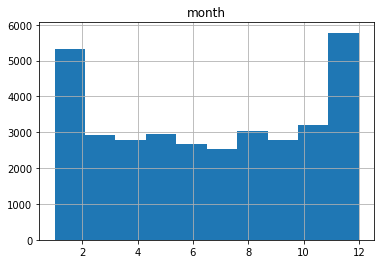

In [27]:
df.hist(['month'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0dc5ae3b38>]],
      dtype=object)

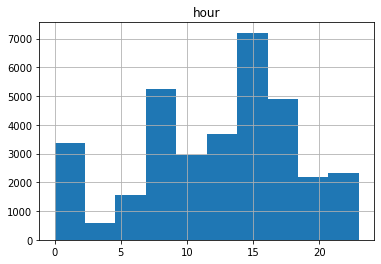

In [28]:
df.hist(['hour'])

In [29]:
df['day of week'] = df['Date and Time'].dt.dayofweek

In [30]:
df.head()

,Date and Time,Number of Motor Vehicles,Hit and Run,Collision Type Description,Weather Description,Illumination Description,Latitude,Longitude,year,date,month,time,hour,injury or fatality,day of week
1845,2018-01-01 08:45:00,1.0,0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,CLEAR,3,36.2718,-86.7615,2018,2018-01-01,1,08:45:00,8,1.0,0
4989,2018-01-03 09:01:00,2.0,0,Front to Rear,CLEAR,3,36.1404,-86.8179,2018,2018-01-03,1,09:01:00,9,0.0,2
11171,2018-02-21 18:50:00,2.0,0,SIDESWIPE - SAME DIRECTION,CLOUDY,0,36.0968,-86.7085,2018,2018-02-21,2,18:50:00,18,0.0,2
11685,2018-01-11 17:59:00,2.0,0,ANGLE,CLOUDY,0,36.1383,-86.7785,2018,2018-01-11,1,17:59:00,17,0.0,3
13845,2018-05-28 21:30:00,2.0,0,ANGLE,CLEAR,0,36.1509,-86.7706,2018,2018-05-28,5,21:30:00,21,3.0,0


In [31]:
df['day of week'].value_counts()

4    5966
3    5431
1    5235
2    5080
0    4932
5    4128
6    3253
Name: day of week, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0db538b978>]],
      dtype=object)

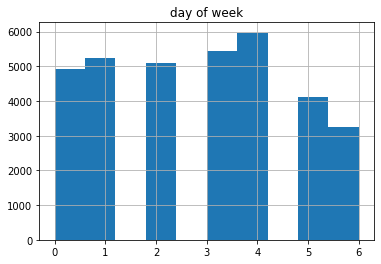

In [32]:
df.hist(['day of week'])

In [33]:
import holidays        
US_holidays = holidays.CountryHoliday('US', prov=None, state='TN')
df['holiday'] = df['date'].map(lambda x: x in US_holidays).astype(int)

In [34]:
df.head()

,Date and Time,Number of Motor Vehicles,Hit and Run,Collision Type Description,Weather Description,Illumination Description,Latitude,Longitude,year,date,month,time,hour,injury or fatality,day of week,holiday
1845,2018-01-01 08:45:00,1.0,0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,CLEAR,3,36.2718,-86.7615,2018,2018-01-01,1,08:45:00,8,1.0,0,1
4989,2018-01-03 09:01:00,2.0,0,Front to Rear,CLEAR,3,36.1404,-86.8179,2018,2018-01-03,1,09:01:00,9,0.0,2,0
11171,2018-02-21 18:50:00,2.0,0,SIDESWIPE - SAME DIRECTION,CLOUDY,0,36.0968,-86.7085,2018,2018-02-21,2,18:50:00,18,0.0,2,0
11685,2018-01-11 17:59:00,2.0,0,ANGLE,CLOUDY,0,36.1383,-86.7785,2018,2018-01-11,1,17:59:00,17,0.0,3,0
13845,2018-05-28 21:30:00,2.0,0,ANGLE,CLEAR,0,36.1509,-86.7706,2018,2018-05-28,5,21:30:00,21,3.0,0,1


In [35]:
df.drop(['Date and Time'], axis=1, inplace=True)

In [36]:
df.head()

,Number of Motor Vehicles,Hit and Run,Collision Type Description,Weather Description,Illumination Description,Latitude,Longitude,year,date,month,time,hour,injury or fatality,day of week,holiday
1845,1.0,0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,CLEAR,3,36.2718,-86.7615,2018,2018-01-01,1,08:45:00,8,1.0,0,1
4989,2.0,0,Front to Rear,CLEAR,3,36.1404,-86.8179,2018,2018-01-03,1,09:01:00,9,0.0,2,0
11171,2.0,0,SIDESWIPE - SAME DIRECTION,CLOUDY,0,36.0968,-86.7085,2018,2018-02-21,2,18:50:00,18,0.0,2,0
11685,2.0,0,ANGLE,CLOUDY,0,36.1383,-86.7785,2018,2018-01-11,1,17:59:00,17,0.0,3,0
13845,2.0,0,ANGLE,CLEAR,0,36.1509,-86.7706,2018,2018-05-28,5,21:30:00,21,3.0,0,1


In [37]:
df['year'].unique()

array(['2018'], dtype=object)

In [38]:
df.drop(['date'], axis=1, inplace=True)
df.head()

,Number of Motor Vehicles,Hit and Run,Collision Type Description,Weather Description,Illumination Description,Latitude,Longitude,year,month,time,hour,injury or fatality,day of week,holiday
1845,1.0,0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,CLEAR,3,36.2718,-86.7615,2018,1,08:45:00,8,1.0,0,1
4989,2.0,0,Front to Rear,CLEAR,3,36.1404,-86.8179,2018,1,09:01:00,9,0.0,2,0
11171,2.0,0,SIDESWIPE - SAME DIRECTION,CLOUDY,0,36.0968,-86.7085,2018,2,18:50:00,18,0.0,2,0
11685,2.0,0,ANGLE,CLOUDY,0,36.1383,-86.7785,2018,1,17:59:00,17,0.0,3,0
13845,2.0,0,ANGLE,CLEAR,0,36.1509,-86.7706,2018,5,21:30:00,21,3.0,0,1


In [39]:
df.drop(['time'], axis=1, inplace=True)
df.head()

,Number of Motor Vehicles,Hit and Run,Collision Type Description,Weather Description,Illumination Description,Latitude,Longitude,year,month,hour,injury or fatality,day of week,holiday
1845,1.0,0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,CLEAR,3,36.2718,-86.7615,2018,1,8,1.0,0,1
4989,2.0,0,Front to Rear,CLEAR,3,36.1404,-86.8179,2018,1,9,0.0,2,0
11171,2.0,0,SIDESWIPE - SAME DIRECTION,CLOUDY,0,36.0968,-86.7085,2018,2,18,0.0,2,0
11685,2.0,0,ANGLE,CLOUDY,0,36.1383,-86.7785,2018,1,17,0.0,3,0
13845,2.0,0,ANGLE,CLEAR,0,36.1509,-86.7706,2018,5,21,3.0,0,1


In [40]:
df.drop(['year'], axis=1, inplace=True)
df.head()

,Number of Motor Vehicles,Hit and Run,Collision Type Description,Weather Description,Illumination Description,Latitude,Longitude,month,hour,injury or fatality,day of week,holiday
1845,1.0,0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,CLEAR,3,36.2718,-86.7615,1,8,1.0,0,1
4989,2.0,0,Front to Rear,CLEAR,3,36.1404,-86.8179,1,9,0.0,2,0
11171,2.0,0,SIDESWIPE - SAME DIRECTION,CLOUDY,0,36.0968,-86.7085,2,18,0.0,2,0
11685,2.0,0,ANGLE,CLOUDY,0,36.1383,-86.7785,1,17,0.0,3,0
13845,2.0,0,ANGLE,CLEAR,0,36.1509,-86.7706,5,21,3.0,0,1


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

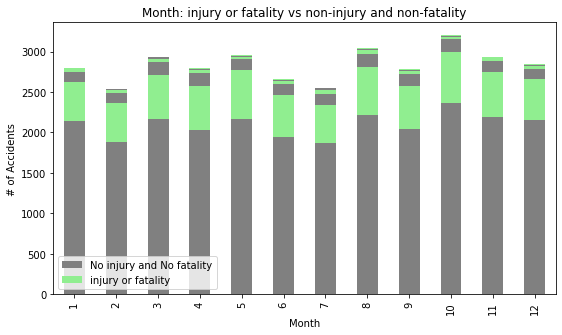

In [42]:
month = df.groupby(['month','injury or fatality'])['month'].count().unstack()
mon = month.plot(kind = 'bar', stacked = True, figsize=(9,5),
                   title = 'Month: injury or fatality vs non-injury and non-fatality', 
                   color = ['grey','lightgreen'], alpha = 1.0)
mon.set_xlabel('Month')
mon.set_ylabel('# of Accidents')
mon.legend(['No injury and No fatality', 'injury or fatality'])
plt.show()

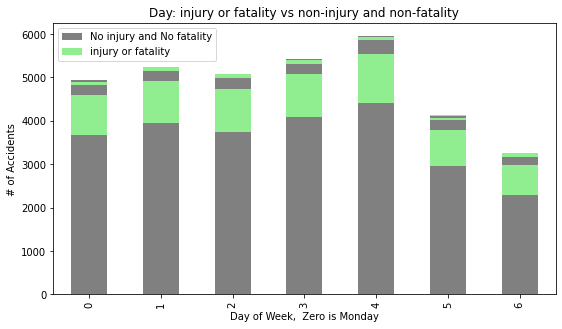

In [43]:
day = df.groupby(['day of week','injury or fatality'])['day of week'].count().unstack()
da = day.plot(kind = 'bar', stacked = True, figsize=(9,5),
                   title = 'Day: injury or fatality vs non-injury and non-fatality', 
                   color = ['grey','lightgreen'], alpha = 1)
da.set_xlabel('Day of Week,  Zero is Monday')
da.set_ylabel('# of Accidents')
da.legend(['No injury and No fatality', 'injury or fatality'])
plt.show()

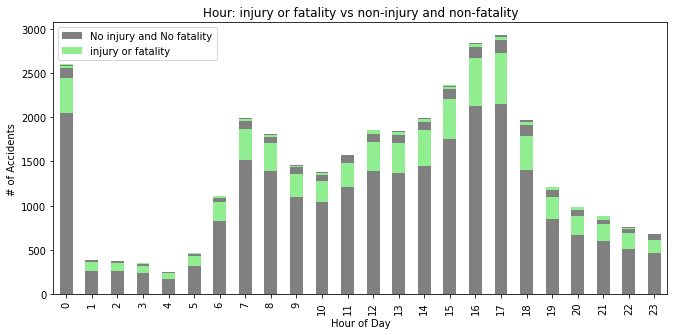

In [44]:
hour = df.groupby(['hour','injury or fatality'])['hour'].count().unstack()
ho = hour.plot(kind = 'bar', stacked = True, figsize=(11,5),
                   title = 'Hour: injury or fatality vs non-injury and non-fatality', 
                   color = ['grey','lightgreen'], alpha = 1.0)
ho.set_xlabel('Hour of Day')
ho.set_ylabel('# of Accidents')
ho.legend(['No injury and No fatality', 'injury or fatality'])
plt.show()

In [45]:
df['holiday'].value_counts()

0    33230
1      795
Name: holiday, dtype: int64

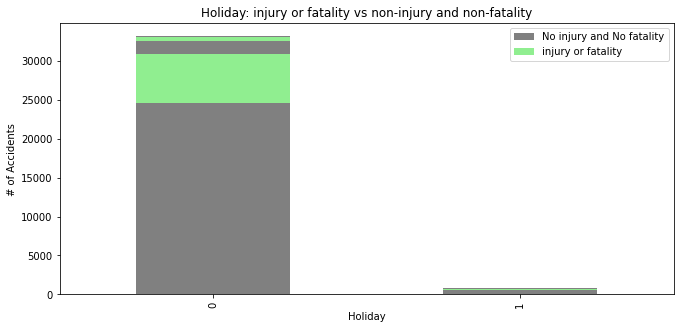

In [46]:
holiday = df.groupby(['holiday','injury or fatality'])['holiday'].count().unstack()
hol = holiday.plot(kind = 'bar', stacked = True, figsize=(11,5),
                   title = 'Holiday: injury or fatality vs non-injury and non-fatality', 
                   color = ['grey','lightgreen'], alpha = 1.0)
hol.set_xlabel('Holiday')
hol.set_ylabel('# of Accidents')
hol.legend(['No injury and No fatality', 'injury or fatality'])
plt.show()

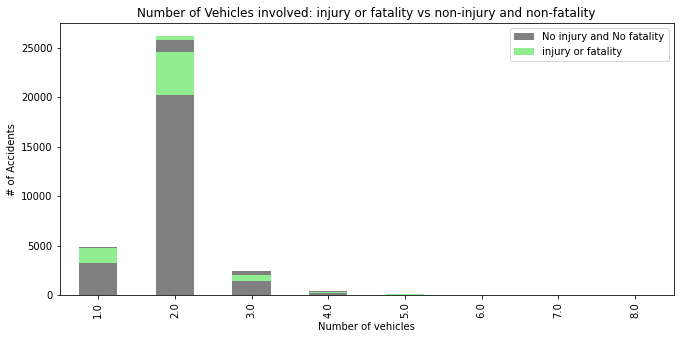

In [47]:
num_veh = df.groupby(['Number of Motor Vehicles','injury or fatality'])['Number of Motor Vehicles'].count().unstack()
nv = num_veh.plot(kind = 'bar', stacked = True, figsize=(11,5),
                   title = 'Number of Vehicles involved: injury or fatality vs non-injury and non-fatality', 
                   color = ['grey','lightgreen'], alpha = 1.0)
nv.set_xlabel('Number of vehicles')
nv.set_ylabel('# of Accidents')
nv.legend(['No injury and No fatality', 'injury or fatality'])
plt.show()

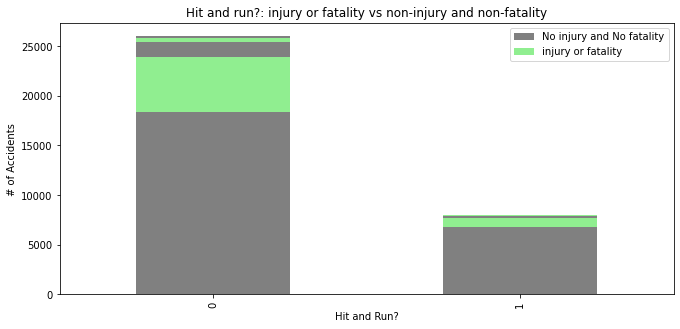

In [48]:
hit_run = df.groupby(['Hit and Run','injury or fatality'])['Hit and Run'].count().unstack()
hit = hit_run.plot(kind = 'bar', stacked = True, figsize=(11,5),
                   title = 'Hit and run?: injury or fatality vs non-injury and non-fatality', 
                   color = ['grey','lightgreen'], alpha = 1.0)
hit.set_xlabel('Hit and Run?')
hit.set_ylabel('# of Accidents')
hit.legend(['No injury and No fatality', 'injury or fatality'])
plt.show()

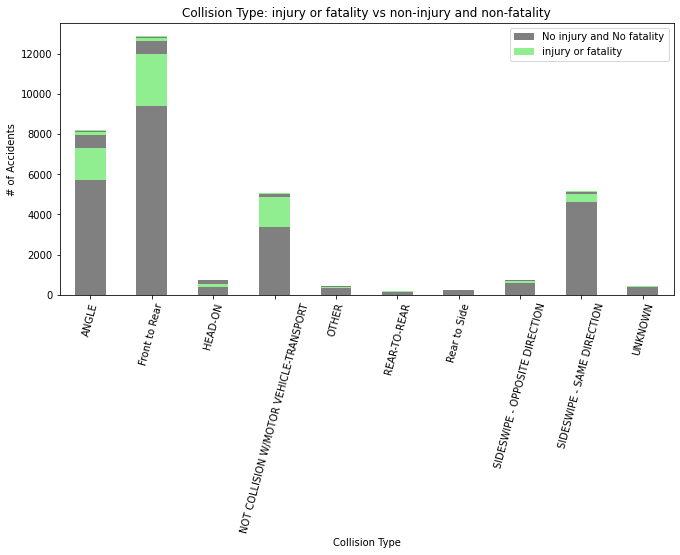

In [49]:
coll = df.groupby(['Collision Type Description','injury or fatality'])['Collision Type Description'].count().unstack()
col = coll.plot(kind = 'bar', stacked = True, figsize=(11,5),
                   title = 'Collision Type: injury or fatality vs non-injury and non-fatality', 
                   color = ['grey','lightgreen'], alpha = 1.0)
col.set_xlabel('Collision Type')
col.set_ylabel('# of Accidents')
col.legend(['No injury and No fatality', 'injury or fatality'])
plt.xticks(rotation = 75)
plt.show()

injury or fatality      0.0     1.0     2.0    3.0   ...  7.0   8.0   9.0   10.0
Weather Description                                  ...                        
BLOWING SNOW            12.0     1.0     NaN    NaN  ...   NaN   NaN   NaN   NaN
CLEAR                17253.0  4402.0  1201.0  311.0  ...  11.0   4.0   2.0   2.0
CLOUDY                3526.0   952.0   247.0   66.0  ...   NaN   1.0   NaN   NaN
FOG                     44.0    15.0     7.0    2.0  ...   NaN   NaN   NaN   NaN
OTHER (NARRATIVE)       12.0     7.0     2.0    NaN  ...   NaN   NaN   NaN   NaN
RAIN                  3710.0  1070.0   227.0   61.0  ...   NaN   1.0   NaN   1.0
SEVERE CROSSWIND         3.0     NaN     NaN    NaN  ...   NaN   NaN   NaN   NaN
SLEET, HAIL             43.0    13.0     3.0    2.0  ...   NaN   NaN   NaN   NaN
SMOG, SMOKE              3.0     NaN     NaN    NaN  ...   NaN   NaN   NaN   NaN
SNOW                   228.0    36.0     8.0    1.0  ...   NaN   NaN   NaN   NaN
UNKNOWN                298.0

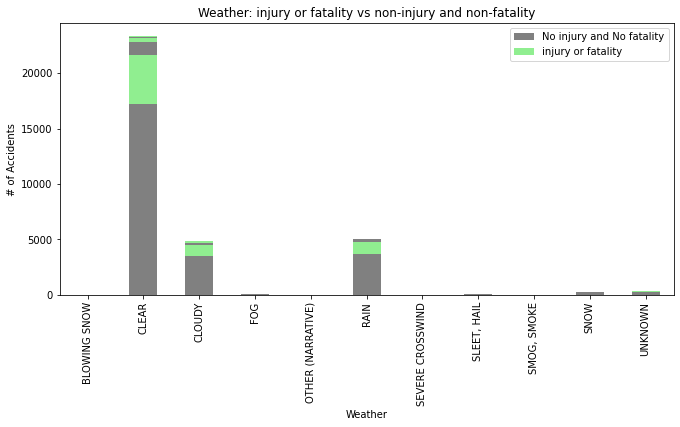

In [50]:
print(df.groupby(['Weather Description','injury or fatality'])['Weather Description'].count().unstack())

weather = df.groupby(['Weather Description','injury or fatality'])['Weather Description'].count().unstack()
w = weather.plot(kind = 'bar', stacked = True, figsize=(11,5),
                   title = 'Weather: injury or fatality vs non-injury and non-fatality', 
                   color = ['grey','lightgreen'], alpha = 1.0)
w.set_xlabel('Weather')
w.set_ylabel('# of Accidents')
w.legend(['No injury and No fatality', 'injury or fatality'])
plt.show()

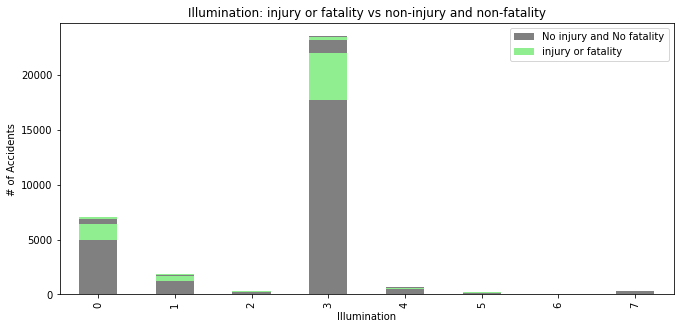

In [51]:
illum = df.groupby(['Illumination Description','injury or fatality'])['Illumination Description'].count().unstack()
ill = illum.plot(kind = 'bar', stacked = True, figsize=(11,5),
                   title = 'Illumination: injury or fatality vs non-injury and non-fatality', 
                   color = ['grey','lightgreen'], alpha = 1.0)
ill.set_xlabel('Illumination')
ill.set_ylabel('# of Accidents')
ill.legend(['No injury and No fatality', 'injury or fatality'])
plt.show()

In [52]:
df['Collision Type Description'].unique()

array(['NOT COLLISION W/MOTOR VEHICLE-TRANSPORT', 'Front to Rear',
       'SIDESWIPE - SAME DIRECTION', 'ANGLE', 'UNKNOWN', 'HEAD-ON',
       'OTHER', 'Rear to Side', 'SIDESWIPE - OPPOSITE DIRECTION',
       'REAR-TO-REAR'], dtype=object)

In [53]:
df['Weather Description'].unique()

array(['CLEAR', 'CLOUDY', 'SNOW', 'RAIN', 'SLEET, HAIL',
       'OTHER (NARRATIVE)', 'UNKNOWN', 'FOG', 'BLOWING SNOW',
       'SEVERE CROSSWIND', 'SMOG, SMOKE'], dtype=object)

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [55]:
df['Collision Type Description'] = le.fit_transform(df['Collision Type Description'])
df['Weather Description'] = le.fit_transform(df['Weather Description'])
df.head()

,Number of Motor Vehicles,Hit and Run,Collision Type Description,Weather Description,Illumination Description,Latitude,Longitude,month,hour,injury or fatality,day of week,holiday
1845,1.0,0,3,1,3,36.2718,-86.7615,1,8,1.0,0,1
4989,2.0,0,1,1,3,36.1404,-86.8179,1,9,0.0,2,0
11171,2.0,0,8,2,0,36.0968,-86.7085,2,18,0.0,2,0
11685,2.0,0,0,2,0,36.1383,-86.7785,1,17,0.0,3,0
13845,2.0,0,0,1,0,36.1509,-86.7706,5,21,3.0,0,1


In [56]:
target = df['injury or fatality']
features = df.drop(columns = ['injury or fatality'])

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=22,test_size=0.25)

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test)

In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
pca.fit(X_train_scaled)
pca.fit(X_test_scaled)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

LinearRegression

In [61]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [62]:
lr = lr.fit(X_train_scaled, y_train)
lr.score(X_test_scaled, y_test)

0.04827553484260105

LogisticRegression

In [63]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [64]:
lg = lg.fit(X_train_scaled,y_train)
lg.score(X_test_scaled,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7338662278123897

Linear SVM

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [66]:
svc = SVC(kernel='linear')
cross_val_score(svc,X_test_scaled,y_test,scoring='accuracy',cv=10).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


0.7339838252574826

Non-Linear SVM

In [67]:
svc = SVC(kernel='rbf')
cross_val_score(svc,X_test_scaled,y_test,scoring='accuracy',cv=10).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


0.7339838252574825

MLNN

In [68]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [69]:
model = Sequential() 
model.add(Dense(50,activation='tanh',input_shape=(11,)))
model.add(Dense(30,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [70]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                600       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 2,161
Trainable params: 2,161
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.fit(X_train_scaled,y_train,epochs=50,batch_size=12)

Epoch 1/50
2127/2127 [==============================] - 3s 1ms/step - loss: 0.6225 - accuracy: 0.6164
Epoch 2/50
2127/2127 [==============================] - 2s 1ms/step - loss: 0.5927 - accuracy: 0.6867
Epoch 3/50
2127/2127 [==============================] - 2s 1ms/step - loss: 0.5721 - accuracy: 0.6863
Epoch 4/50
2127/2127 [==============================] - 2s 1ms/step - loss: 0.5597 - accuracy: 0.6808
Epoch 5/50
2127/2127 [==============================] - 3s 1ms/step - loss: 0.5364 - accuracy: 0.6931
Epoch 6/50
2127/2127 [==============================] - 2s 1ms/step - loss: 0.5425 - accuracy: 0.6924
Epoch 7/50
2127/2127 [==============================] - 2s 1ms/step - loss: 0.5307 - accuracy: 0.6887
Epoch 8/50
2127/2127 [==============================] - 3s 1ms/step - loss: 0.5401 - accuracy: 0.6869
Epoch 9/50
2127/2127 [==============================] - 2s 1ms/step - loss: 0.4823 - accuracy: 0.6915
Epoch 10/50
2127/2127 [==============================] - 3s 1ms/step - loss: 0.516

In [72]:
test_los,test_acc = model.evaluate(X_test_scaled, y_test)

266/266 [==============================] - 0s 832us/step - loss: 0.3032 - accuracy: 0.7048


GaussianNB

In [73]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [74]:
gnb.fit(X_train_scaled,y_train)
gnb.score(X_test_scaled,y_test)

0.09110144586810862

Ridge

In [75]:
from sklearn.linear_model import Ridge
rg = Ridge(alpha=0.001,normalize=True)

In [76]:
rg_score = cross_val_score(rg,X_test_scaled,y_test,cv=10,scoring='r2')
rg_score

array([0.02966945, 0.06345123, 0.05629468, 0.05504754, 0.04288654,
       0.01474122, 0.05839472, 0.04343161, 0.05973994, 0.04107423])

In [77]:
rg_score.mean()

0.04647311454511832

In [78]:
from sklearn.linear_model import RidgeCV

In [79]:
rgcv = RidgeCV(alphas=(1.0,0.1,0.01,0.005,0.0025,0.001,0.00025),normalize=True)

In [80]:
rgcv.fit(X_train_scaled,y_train)

RidgeCV(alphas=array([1.0e+00, 1.0e-01, 1.0e-02, 5.0e-03, 2.5e-03, 1.0e-03, 2.5e-04]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring=None, store_cv_values=False)

In [81]:
rgcv.score(X_test_scaled,y_test)

0.048300739872295106

Lasso

In [82]:
from sklearn.linear_model import LassoCV

In [83]:
lscv = LassoCV(alphas=(1.0,0.1,0.01,0.005,0.0025,0.001,0.00025),normalize=True)

In [84]:
lscv.fit(X_train_scaled,y_train)

LassoCV(alphas=(1.0, 0.1, 0.01, 0.005, 0.0025, 0.001, 0.00025), copy_X=True,
        cv=None, eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100,
        n_jobs=None, normalize=True, positive=False, precompute='auto',
        random_state=None, selection='cyclic', tol=0.0001, verbose=False)

In [85]:
lscv.score(X_test_scaled,y_test)

0.03581593346596301

ElasticNet

In [86]:
from sklearn.linear_model import ElasticNet,ElasticNetCV

In [87]:
en = ElasticNet(alpha=0.001,l1_ratio=0.8,normalize=True)
en_score = cross_val_score(en,X_train_scaled,y_train,cv=10,scoring='r2')
encv = ElasticNetCV(alphas=(0.1,0.01,0.005,0.0025,0.001),l1_ratio=(0.1,0.25,0.5,0.75,0.8),normalize=True)
encv.fit(X_train_scaled,y_train)

ElasticNetCV(alphas=(0.1, 0.01, 0.005, 0.0025, 0.001), copy_X=True, cv=None,
             eps=0.001, fit_intercept=True,
             l1_ratio=(0.1, 0.25, 0.5, 0.75, 0.8), max_iter=1000, n_alphas=100,
             n_jobs=None, normalize=True, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [88]:
encv.score(X_test_scaled,y_test)

0.0036692976986023584

Decision tree

In [89]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()

In [90]:
dt.fit(X_train_scaled, y_train)
dt.score(X_test_scaled, y_test)

0.596449982367462

In [91]:
dtr = tree.DecisionTreeRegressor()

In [92]:
dtr.fit(X_train_scaled, y_train)
dtr.score(X_test_scaled, y_test)

-0.9930805980286751